# Setup

In [1]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import pyBigWig

In [2]:
os.chdir("/home/fichtner/projects/footprintQTL")
os.getcwd()

'/omics/groups/OE0540/internal/users/fichtner/projects/footprintQTL'

### User variables

In [3]:
DATA_PATH_CBN = "data/datasets/hca_brain-organoids_grouped_restricted/coverages_chrombpnet"
DATA_PATH_SAFT = "data/datasets/hca_brain-organoids_grouped_restricted/coverages_scATAC-fragment-tools/"

In [4]:
# 0-based half open, code handles changes if needed
regions = {
    'CYC1': ['chr8', 144095039 - 101, 144095039 + 100 ], # Cytochrome C1 (+) chr8:144,095,039-144,097,525
    'RPL13': ['chr8', 120445402 - 101, 120445402 + 100], # Mitochondrial Ribosomal Protein L13 (-) chr8:120,380,761-120,445,402
    'MEF2C': ['chr5', 88904257 - 101, 88904257 + 100], # (-) chr5:88717117-88904257 1-based
    'SOX2': ['chr3', 181711925 - 101, 181711925 + 100], # (+) chr3:181,711,925-181,714,436 
    'LHX5': ['chr12', 113472280 - 101, 113472280 + 100] # (-) chr12:113,462,033-113,472,280
}

# Coverages

## ChromBPNet

In [5]:
print("Insertions +- 100bp of TSS")

counts = []

for r in regions.keys():

    for i in [f for f in os.listdir(DATA_PATH_CBN) if os.path.isfile(f'{DATA_PATH_CBN}/{f}') and f.endswith('.bw')]:
    
        bw = pyBigWig.open(f'{DATA_PATH_CBN}/{i}')
    
        cov = np.nan_to_num(bw.values(*regions[r], numpy=True), 0)

        d, ct, _ = i.split("_")

        counts.append([r, d, ct, int(np.sum(cov))])
            
        bw.close()

counts_df = pd.DataFrame(counts, columns=['region', 'donor', 'cell_type', 'insertions'])

counts_df = pd.pivot_table(counts_df, index=['donor', 'cell_type'], columns='region', values='insertions').reset_index()
counts_df.columns.name = None
counts_df

Insertions +- 100bp of TSS


,donor,cell_type,CYC1,LHX5,MEF2C,RPL13,SOX2
0,melw,Glia,1,0,0,0,1
1,melw,Midbrain-EN,230,10,0,47,45
2,pelm,Glia,96,1,0,42,73
3,pelm,Midbrain-EN,102,12,0,45,27
4,pelm,UL-EN,50,2,0,12,5
5,ualf,Glia,277,11,0,57,170
6,ualf,Midbrain-EN,0,0,0,0,0
7,ualf,UL-EN,113,12,0,62,11
8,zoxy,Glia,15,0,0,3,7
9,zoxy,Midbrain-EN,45,3,0,8,12


[0 0 0 0 4 0 1 0 0 0 1 0]


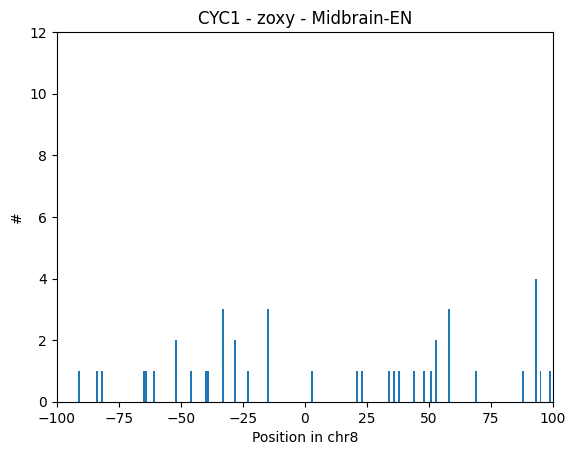

[0 1 0 0 9 0 1 0 0 1 3 0]


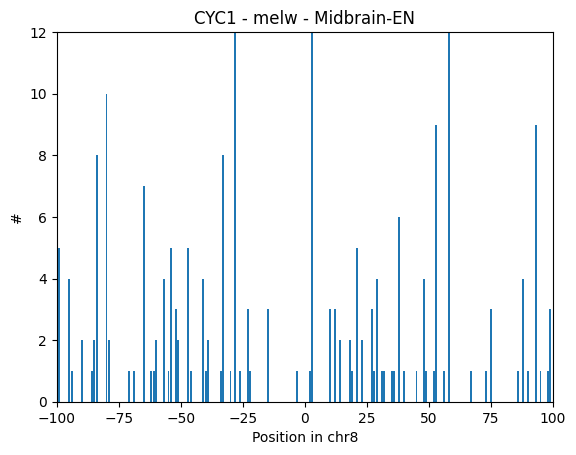

[0 1 0 0 6 0 1 0 0 1 0 0]


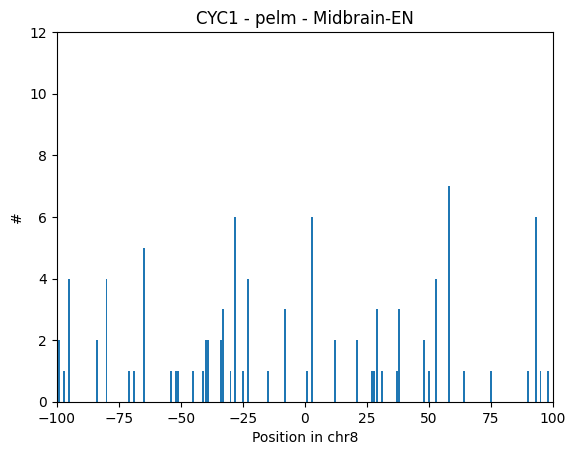

[0 1 0 0 7 0 1 0 0 2 2 0]


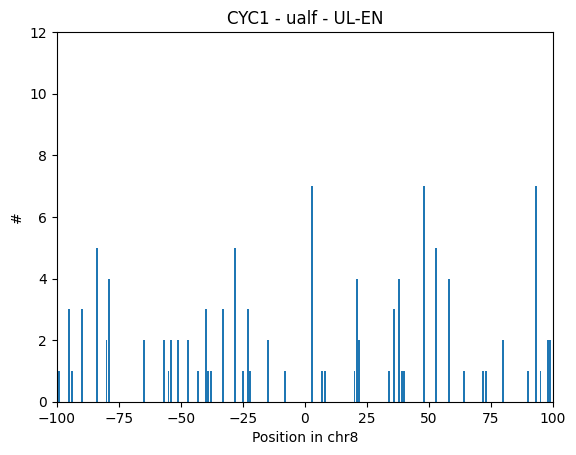

[0 0 0 0 1 0 0 0 0 2 0 0]


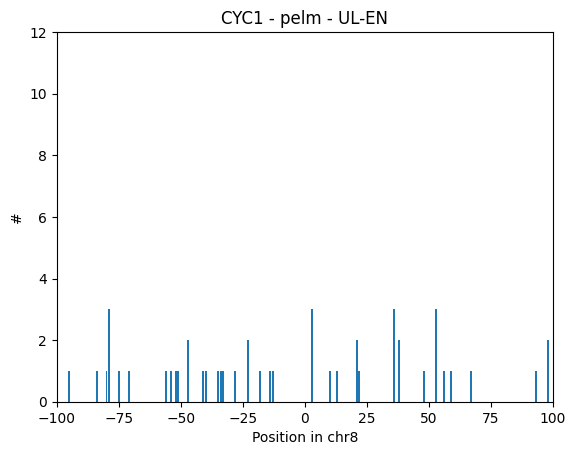

[0 0 0 0 5 0 1 0 0 1 1 0]


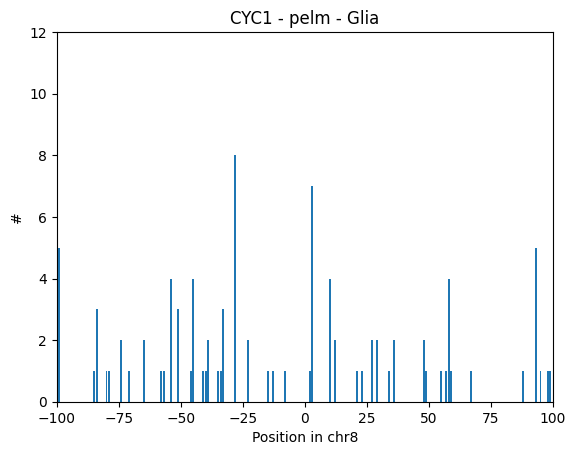

[0 0 0 0 0 0 0 0 0 0 0 0]


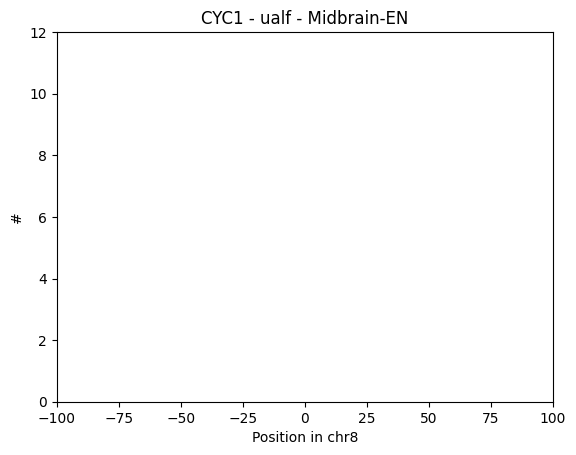

[0 0 0 0 1 0 0 0 0 0 0 0]


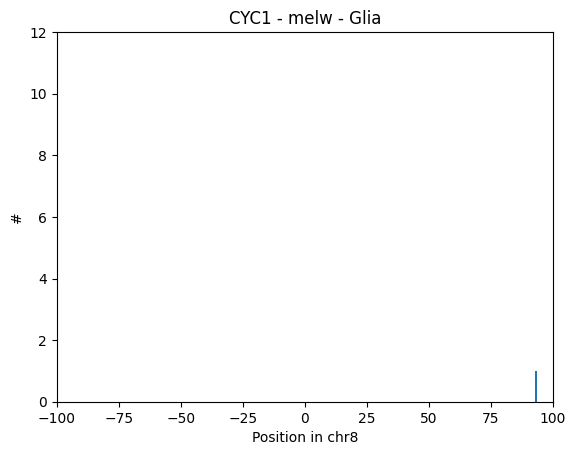

[0 0 0 0 0 0 0 0 0 0 0 0]


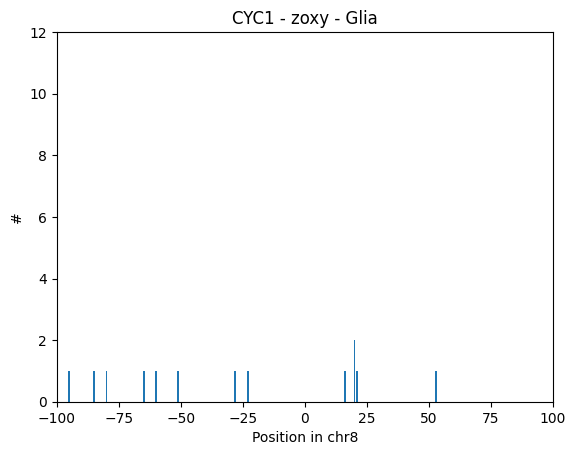

[ 0  1  0  0 14  0  2  0  5  2  2  0]


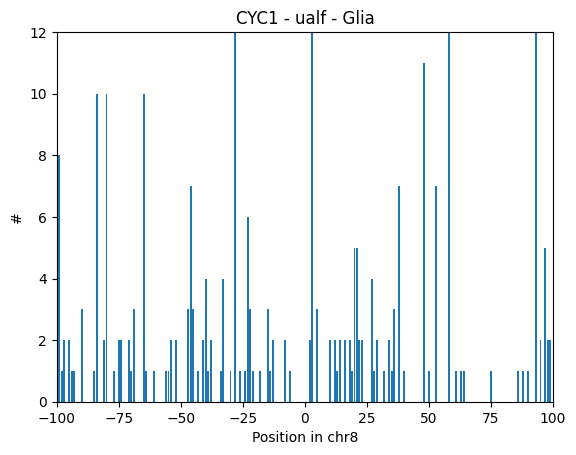

[0 0 0 0 0 0 0 0 0 0 0 0]


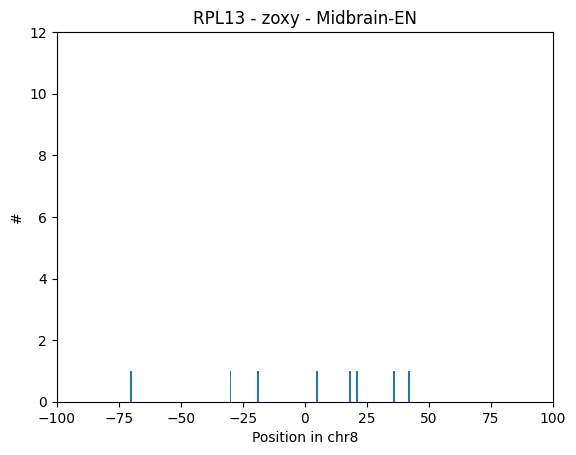

[0 0 0 0 0 0 0 0 0 0 0 0]


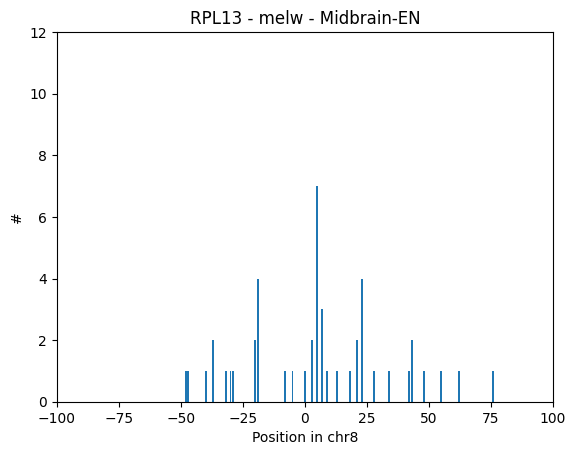

[0 0 0 0 0 0 0 1 2 1 0 0]


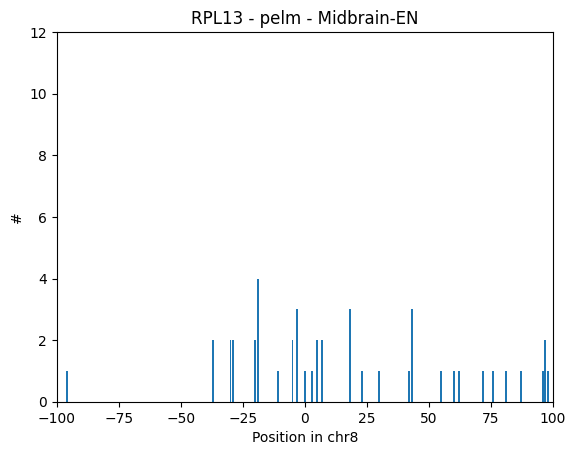

[0 0 0 0 0 0 0 0 0 0 0 0]


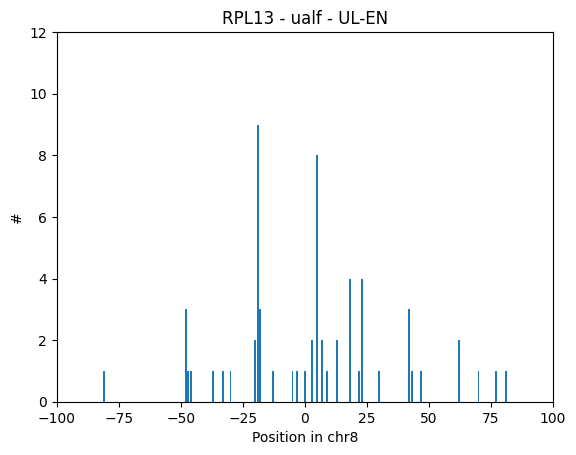

[0 0 0 0 0 0 0 0 0 0 0 0]


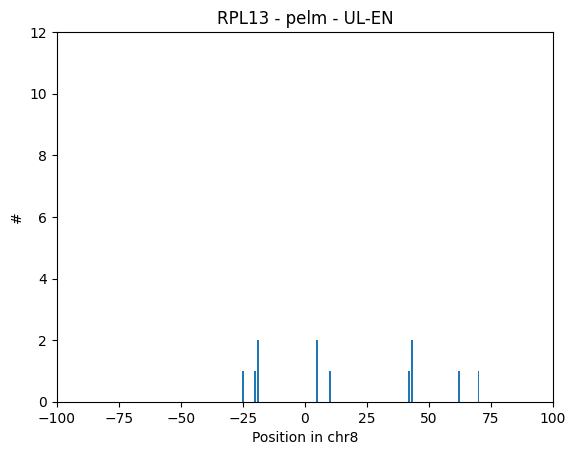

[0 0 1 0 0 0 0 0 0 0 0 0]


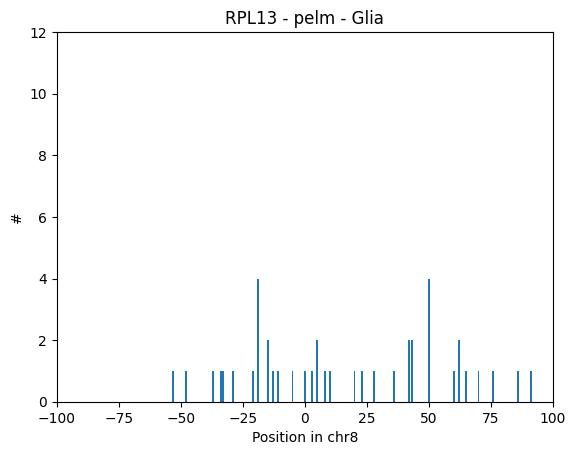

[0 0 0 0 0 0 0 0 0 0 0 0]


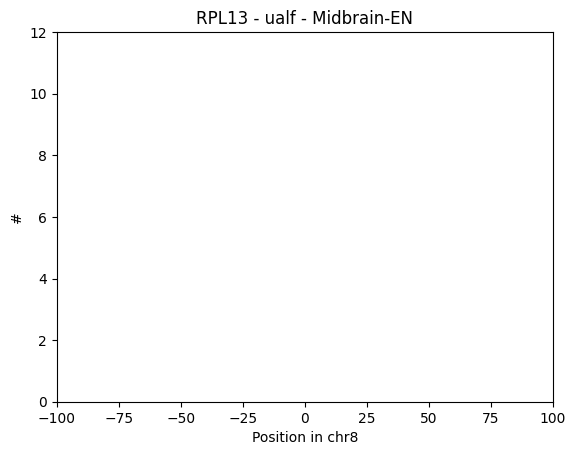

[0 0 0 0 0 0 0 0 0 0 0 0]


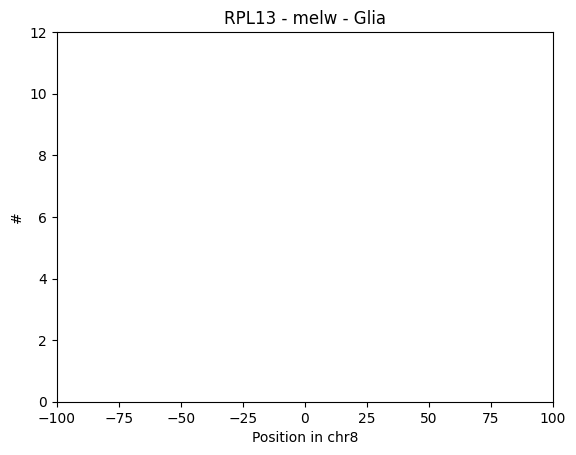

[0 0 0 0 0 0 0 0 0 0 0 0]


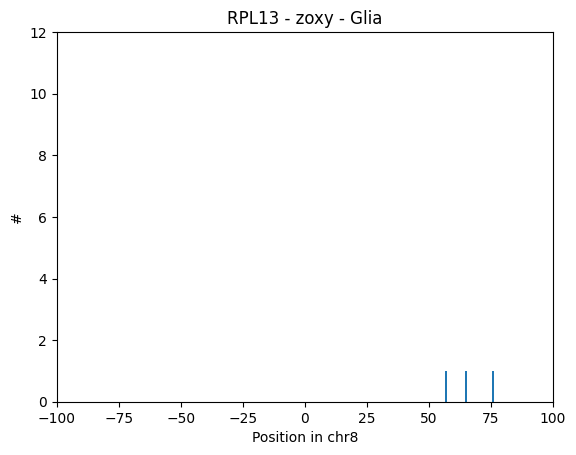

[0 0 0 0 0 0 0 0 0 0 0 0]


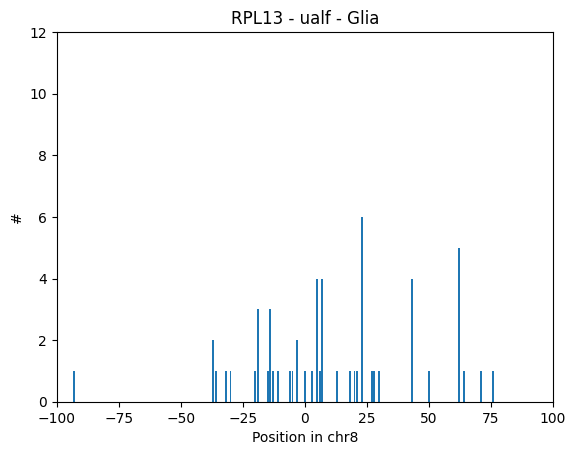

[0 0 0 0 0 0 0 0 0 0 0 0]


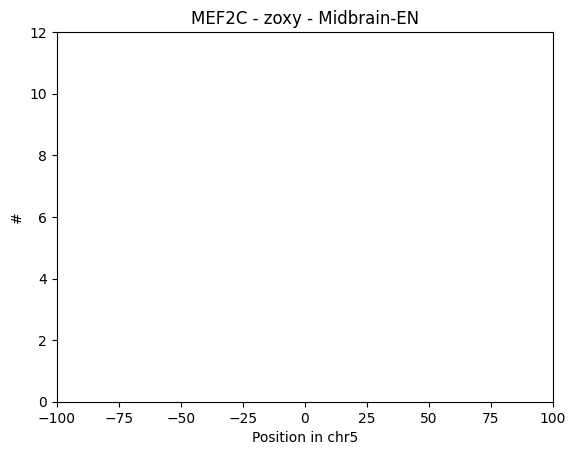

[0 0 0 0 0 0 0 0 0 0 0 0]


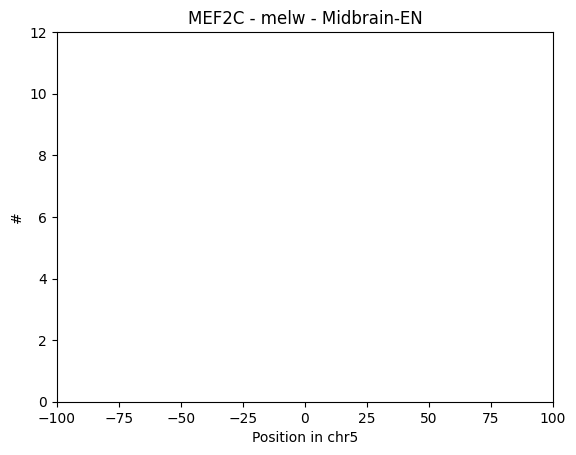

[0 0 0 0 0 0 0 0 0 0 0 0]


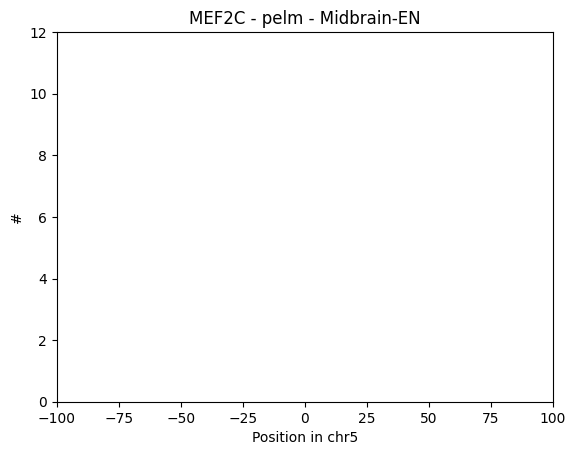

[0 0 0 0 0 0 0 0 0 0 0 0]


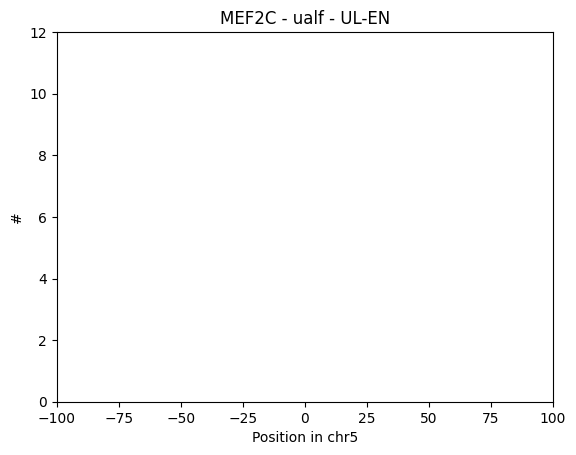

[0 0 0 0 0 0 0 0 0 0 0 0]


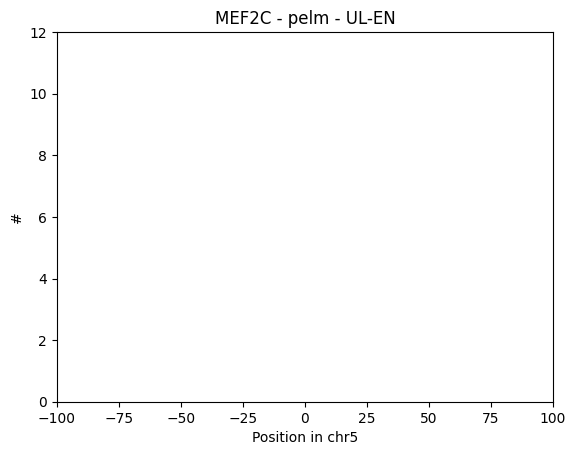

[0 0 0 0 0 0 0 0 0 0 0 0]


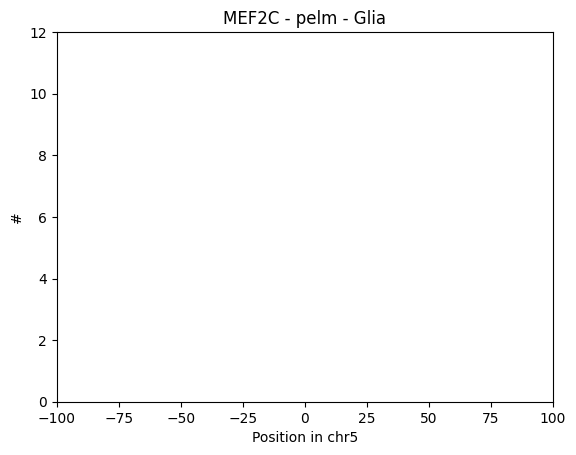

[0 0 0 0 0 0 0 0 0 0 0 0]


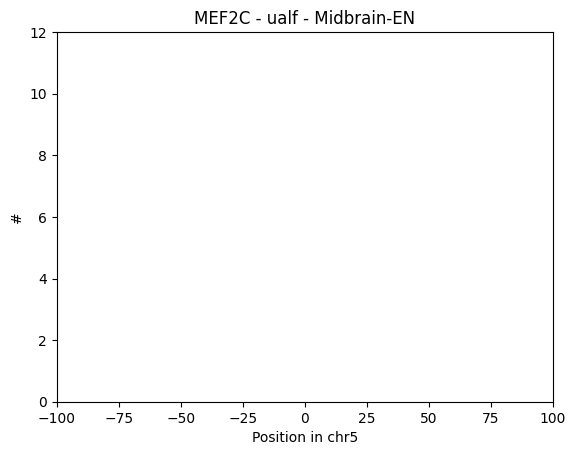

[0 0 0 0 0 0 0 0 0 0 0 0]


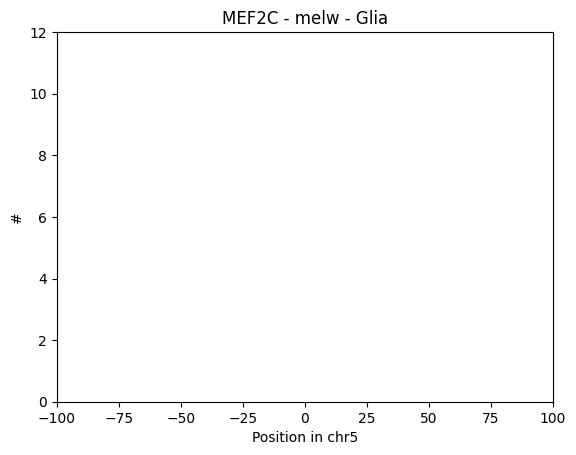

[0 0 0 0 0 0 0 0 0 0 0 0]


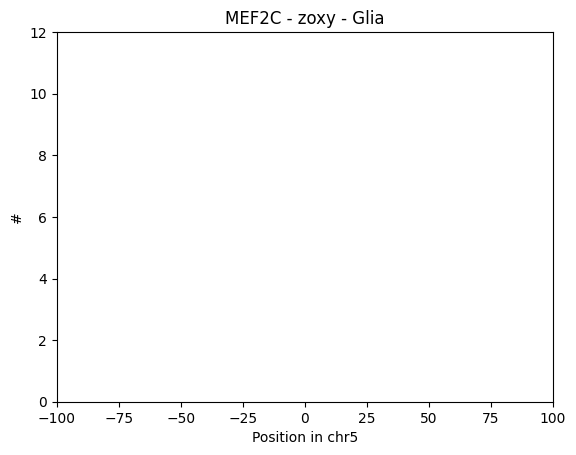

[0 0 0 0 0 0 0 0 0 0 0 0]


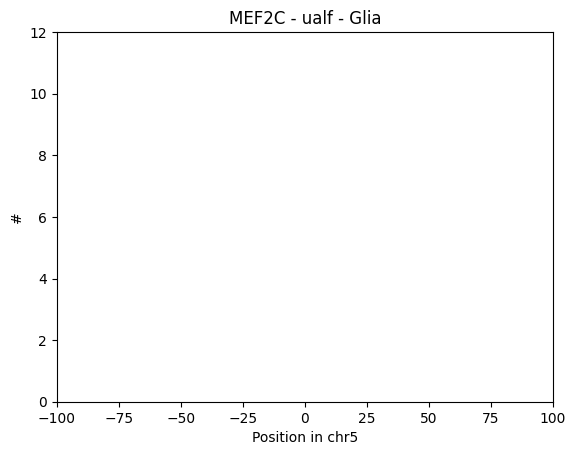

[0 0 0 0 0 0 0 0 0 0 0 0]


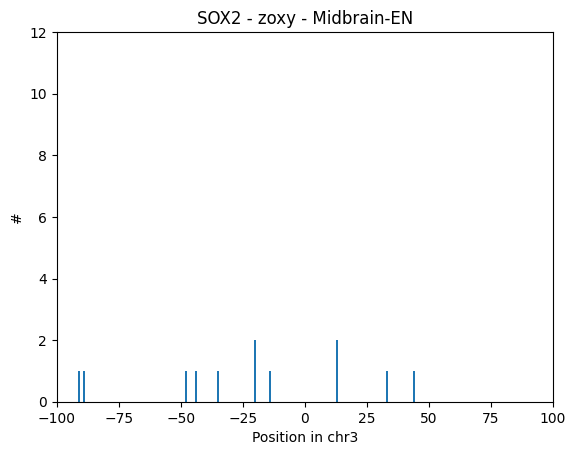

[0 0 0 0 0 0 0 0 0 0 0 0]


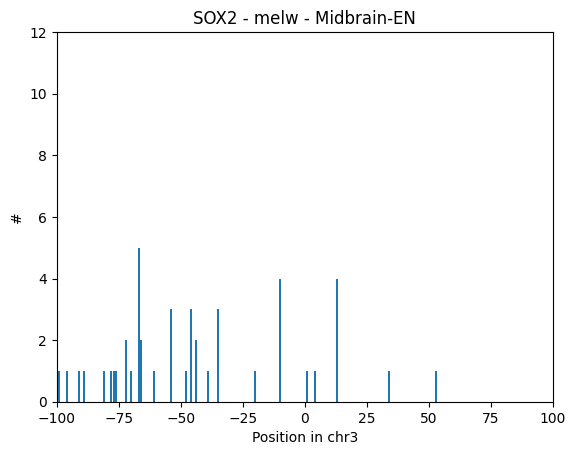

[0 0 0 0 0 0 0 0 0 0 0 0]


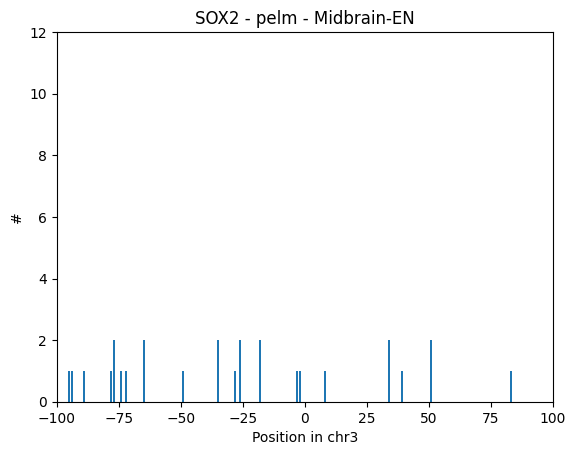

[0 0 0 0 0 0 0 0 1 0 0 0]


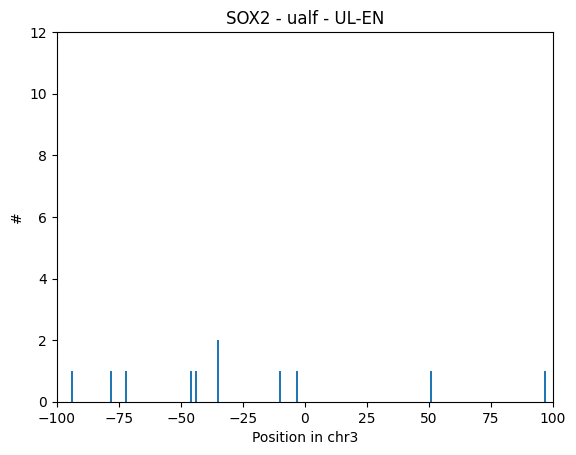

[0 0 0 0 0 0 0 0 0 0 0 0]


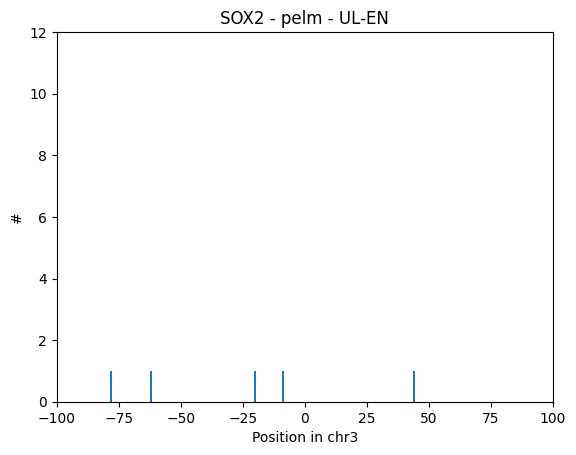

[0 0 0 0 0 0 0 0 0 0 0 0]


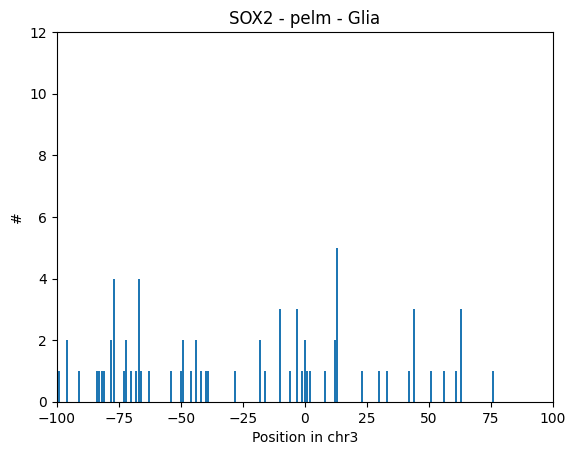

[0 0 0 0 0 0 0 0 0 0 0 0]


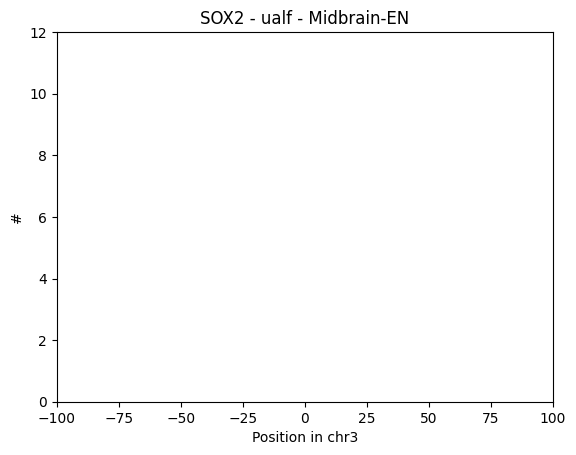

[0 0 0 0 0 0 0 0 0 0 0 0]


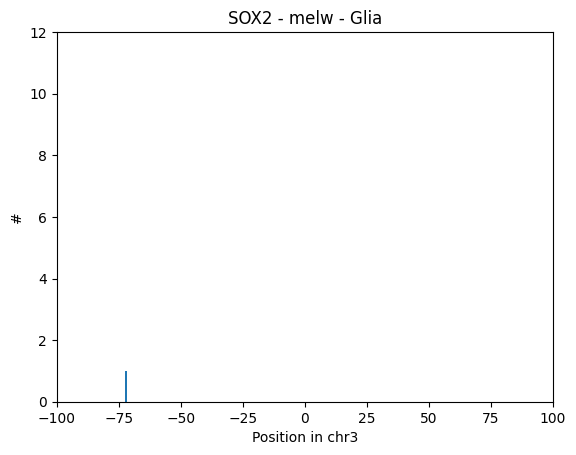

[0 0 0 0 0 0 0 0 0 0 0 0]


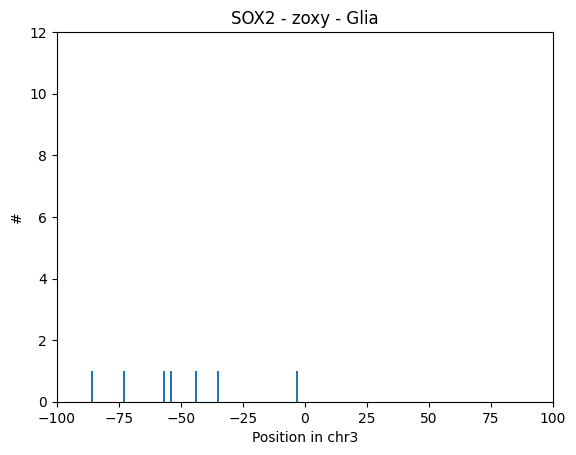

[0 1 0 0 0 0 3 0 3 0 0 0]


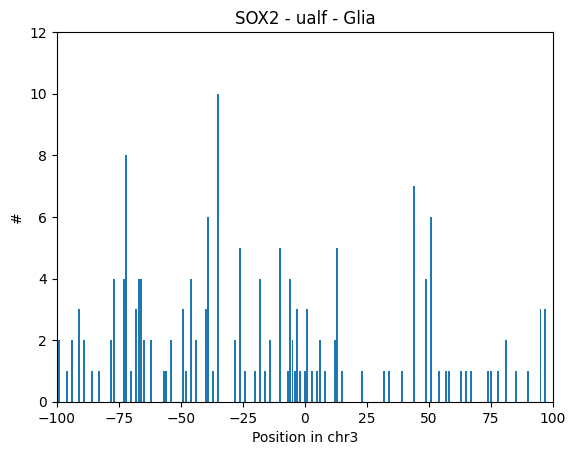

[0 0 0 0 0 0 0 0 0 0 0 0]


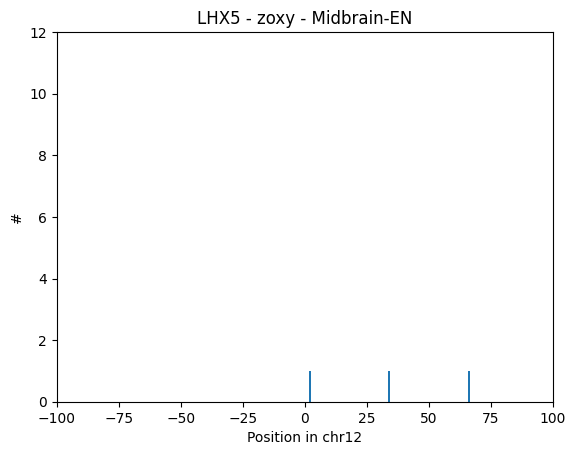

[0 0 0 0 0 0 0 0 1 0 0 0]


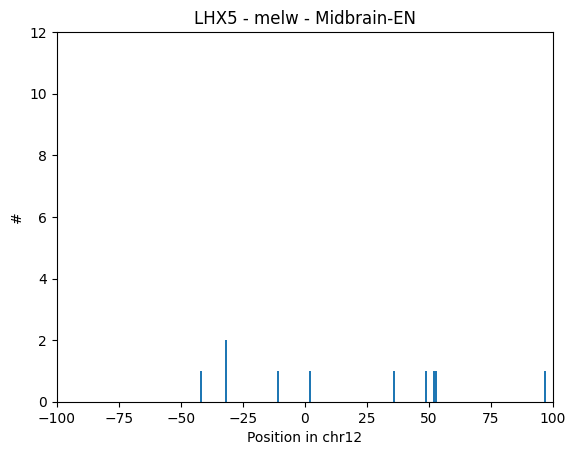

[0 0 0 0 0 0 0 0 2 0 0 0]


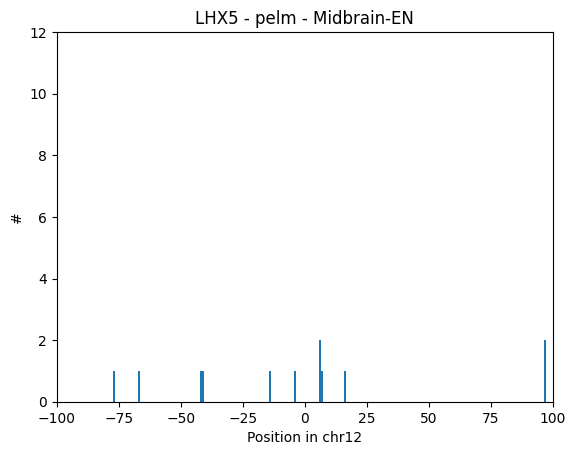

[0 0 0 0 0 0 0 0 0 0 0 0]


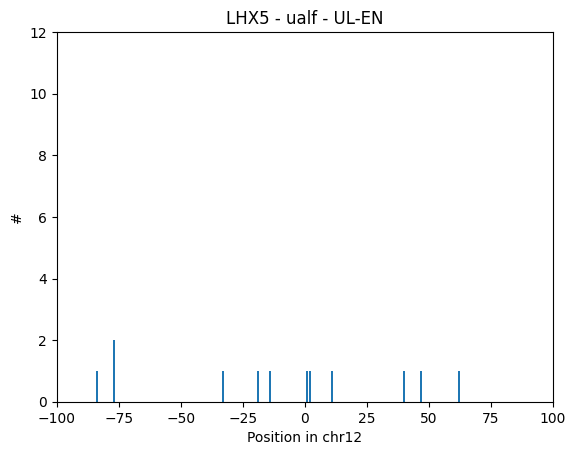

[0 0 0 0 0 0 0 0 0 0 0 0]


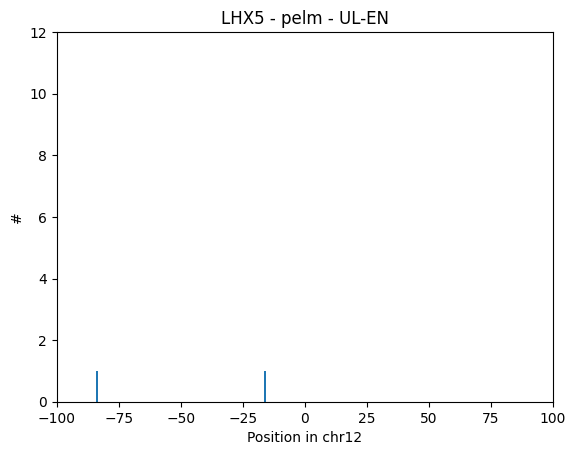

[0 0 0 0 0 0 0 0 0 0 0 0]


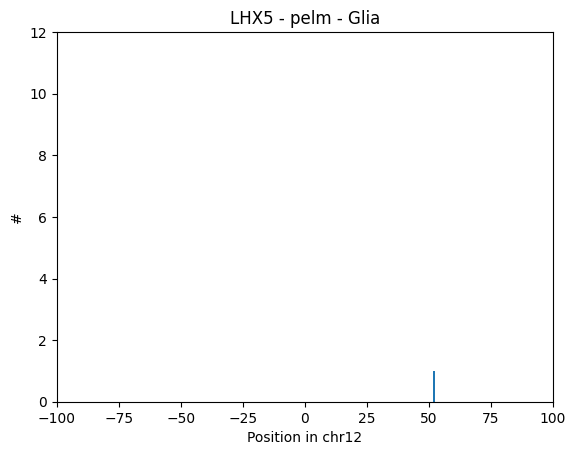

[0 0 0 0 0 0 0 0 0 0 0 0]


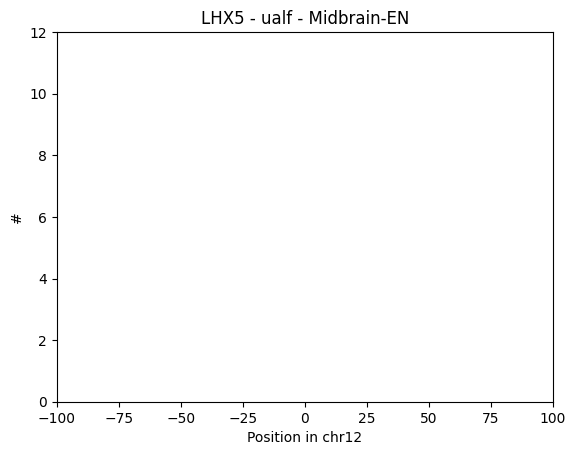

[0 0 0 0 0 0 0 0 0 0 0 0]


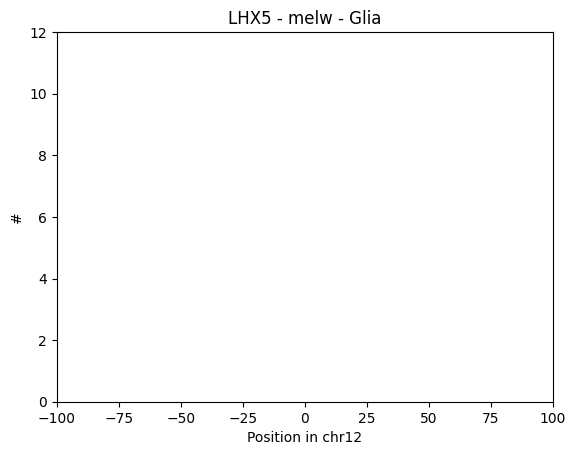

[0 0 0 0 0 0 0 0 0 0 0 0]


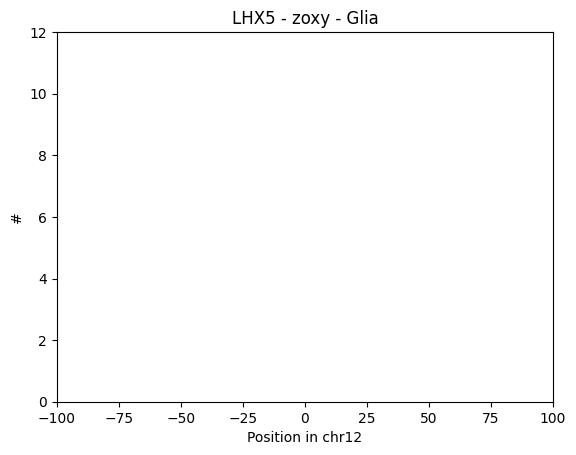

[1 0 0 1 0 0 0 0 0 1 0 0]


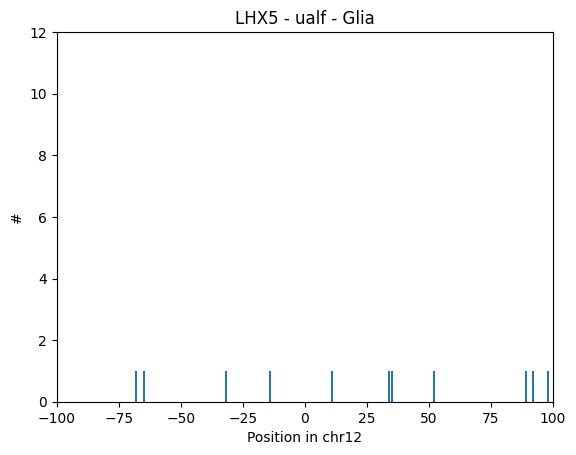

In [6]:
for r in regions.keys():

    for i in [f for f in os.listdir(DATA_PATH_CBN) if os.path.isfile(f'{DATA_PATH_CBN}/{f}') and f.endswith('.bw')]:
    
        bw = pyBigWig.open(f'{DATA_PATH_CBN}/{i}')
    
        cov = bw.values(*regions[r], numpy=True)
        print(np.nan_to_num(cov[189:], 0).astype(int))
            
        bw.close()
        
        i = i[:-14].split('_')
        donor = i[0]
        ct = i[1]
        lenth = len(cov)

        plt.bar(np.linspace(-(lenth // 2), lenth // 2, lenth), cov)

        plt.xlim([-(lenth // 2), lenth // 2])
        plt.ylim([0, 12])

        plt.title(f'{r} - {donor} - {ct}')
        plt.xlabel(f'Position in {regions[r][0]}')
        plt.ylabel('#')

        plt.show()








## scATAC fragment tools

In [7]:
print("Insertions +- 100bp of TSS")

counts = []

for r in regions.keys():

    for i in [f for f in os.listdir(DATA_PATH_SAFT) if os.path.isfile(f'{DATA_PATH_SAFT}/{f}') and f.endswith('.bw')]:
    
        bw = pyBigWig.open(f'{DATA_PATH_SAFT}/{i}')
    
        cov = np.nan_to_num(bw.values(*regions[r], numpy=True), 0)

        d, ct = i.split("_")

        counts.append([r, d, ct, int(np.sum(cov))])
            
        bw.close()

counts_df = pd.DataFrame(counts, columns=['region', 'donor', 'cell_type', 'insertions'])

counts_df = pd.pivot_table(counts_df, index=['donor', 'cell_type'], columns='region', values='insertions').reset_index()
counts_df.columns.name = None
counts_df

Insertions +- 100bp of TSS


,donor,cell_type,CYC1,LHX5,MEF2C,RPL13,SOX2
0,melw,Glia.bw,1,0,0,0,1
1,melw,Midbrain-EN.bw,228,10,0,47,45
2,pelm,Glia.bw,95,1,0,42,73
3,pelm,Midbrain-EN.bw,98,12,0,45,27
4,pelm,UL-EN.bw,49,2,0,12,5
5,ualf,Glia.bw,269,11,0,57,170
6,ualf,Midbrain-EN.bw,0,0,0,0,0
7,ualf,UL-EN.bw,113,12,0,62,11
8,zoxy,Glia.bw,15,0,0,3,7
9,zoxy,Midbrain-EN.bw,45,3,0,8,12


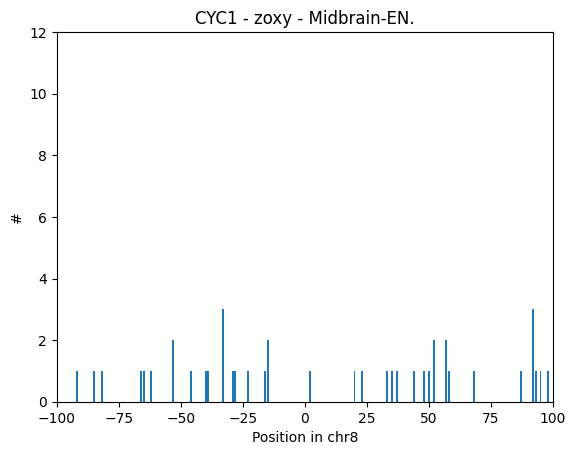

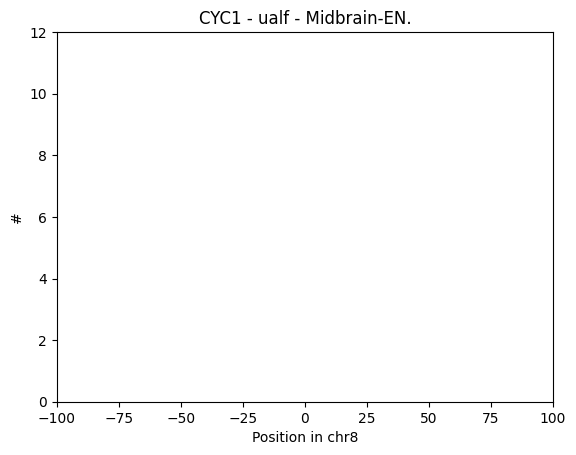

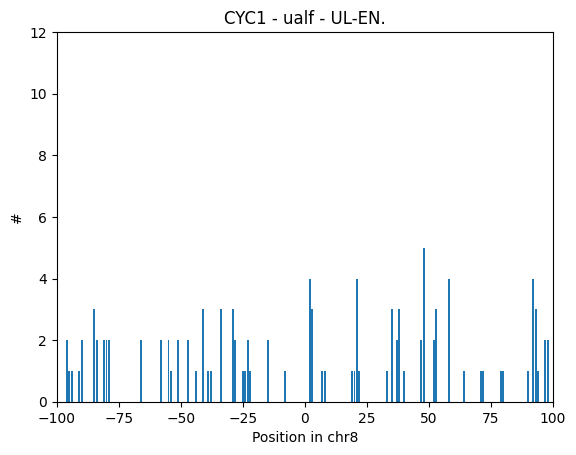

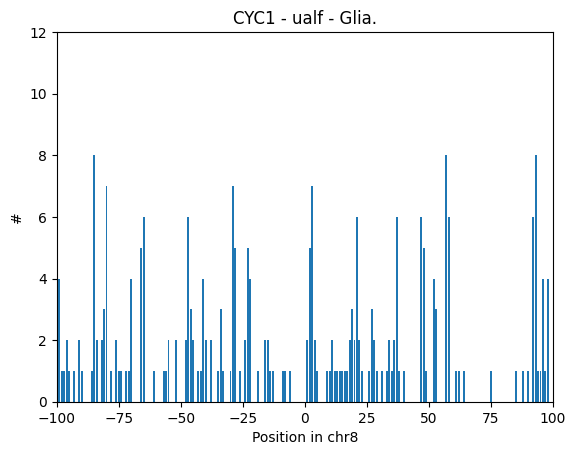

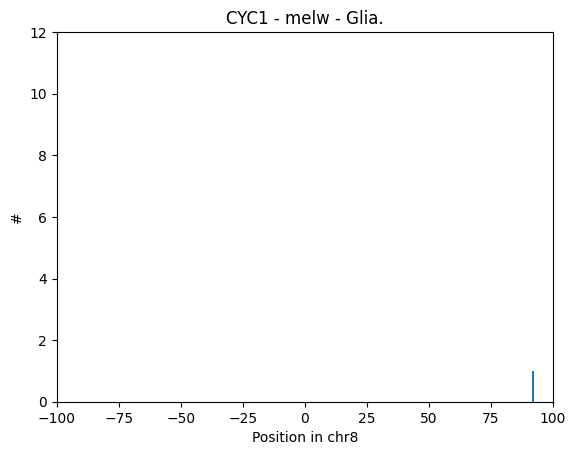

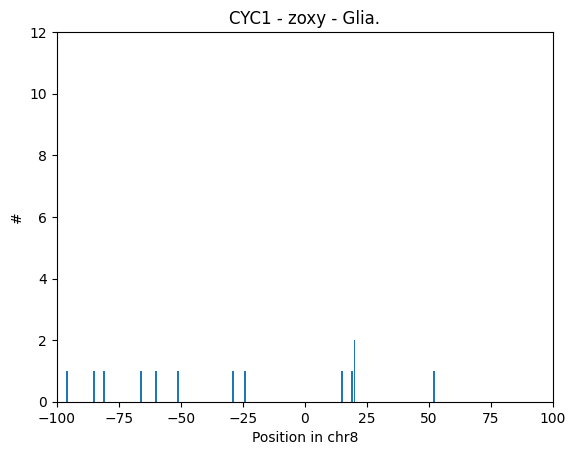

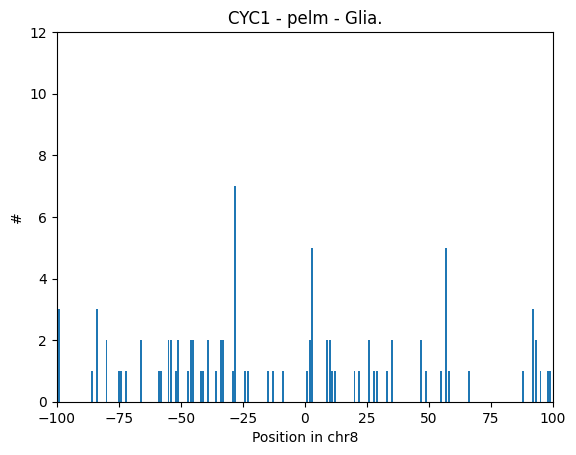

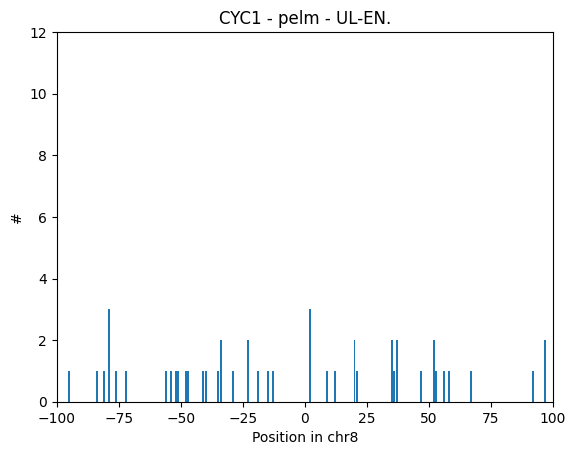

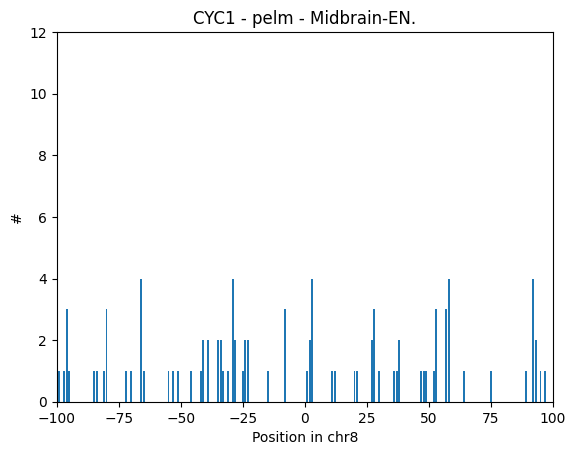

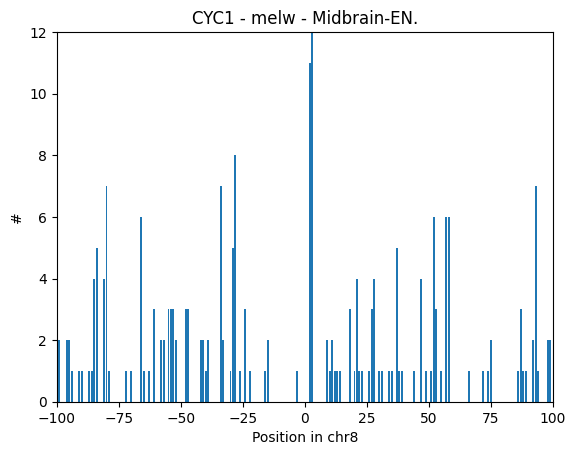

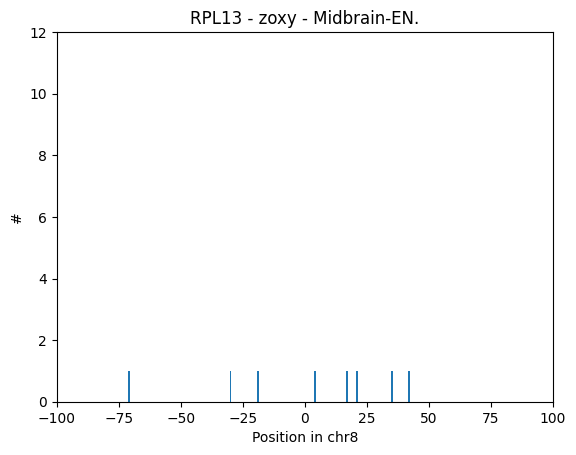

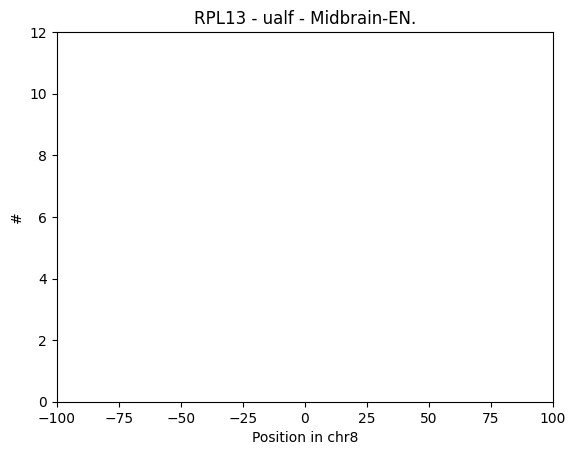

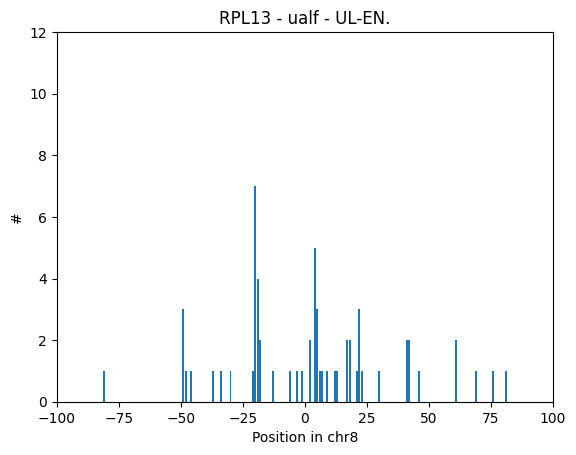

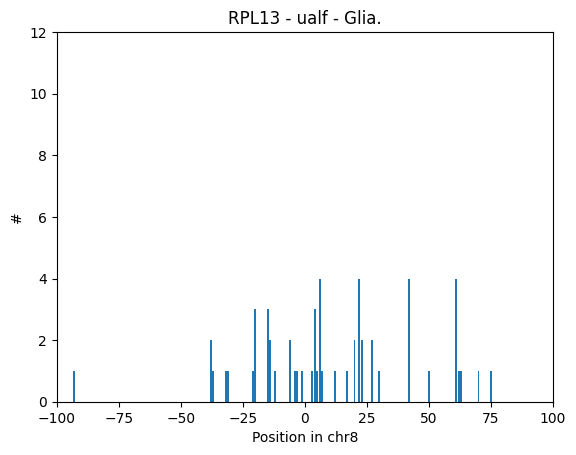

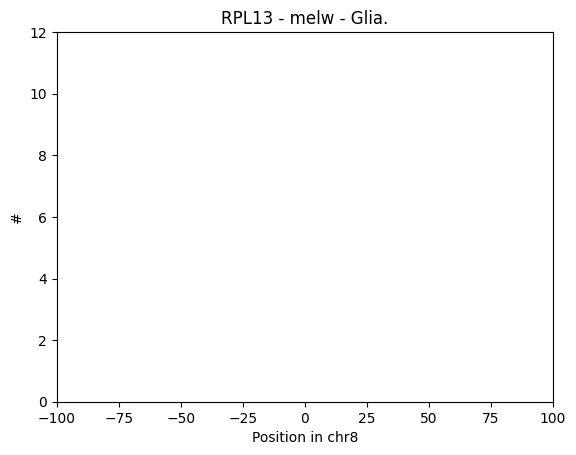

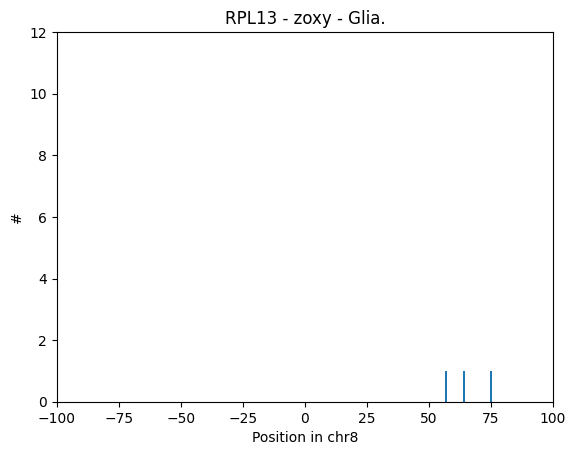

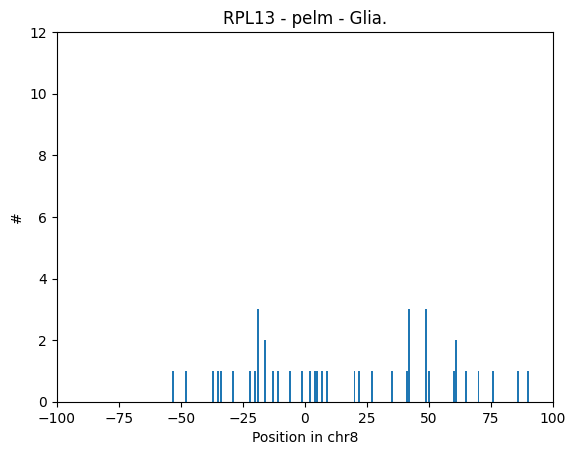

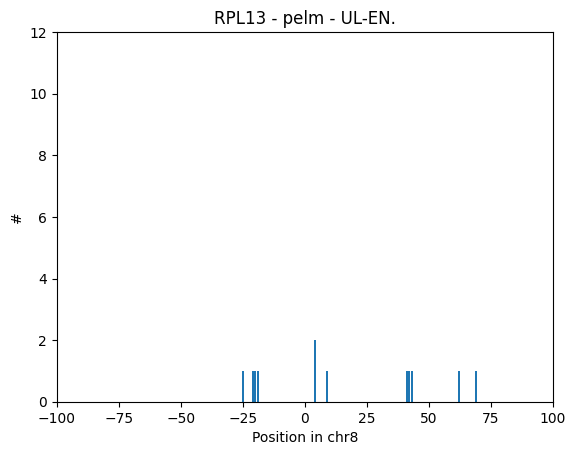

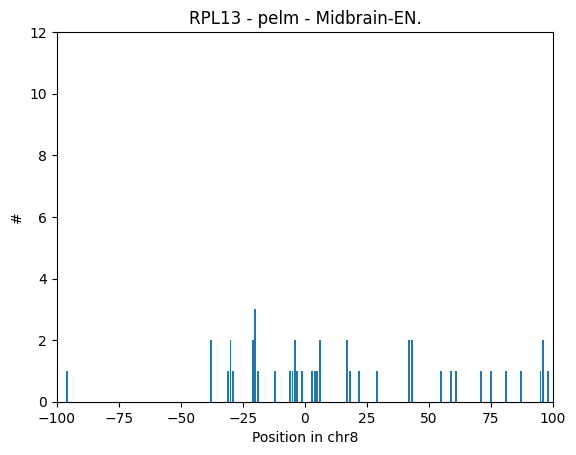

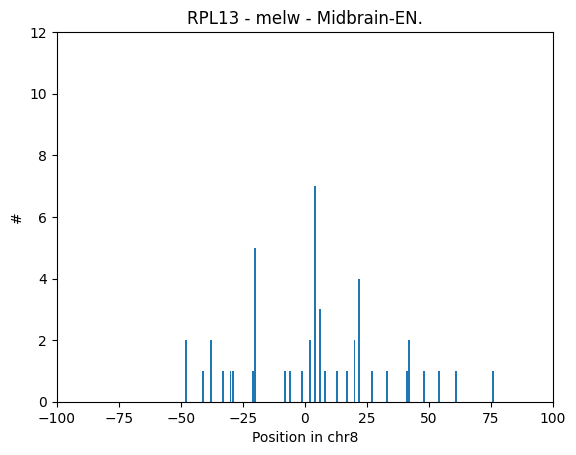

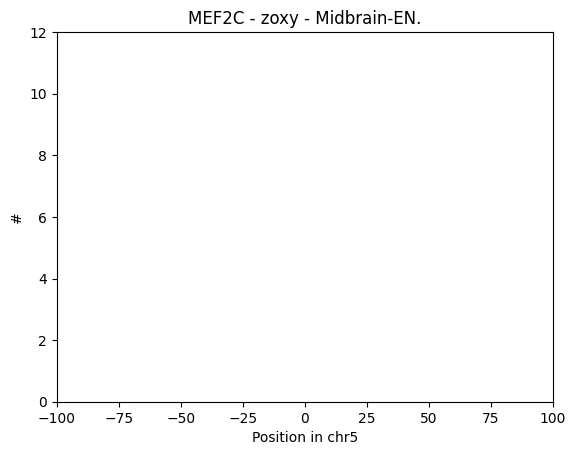

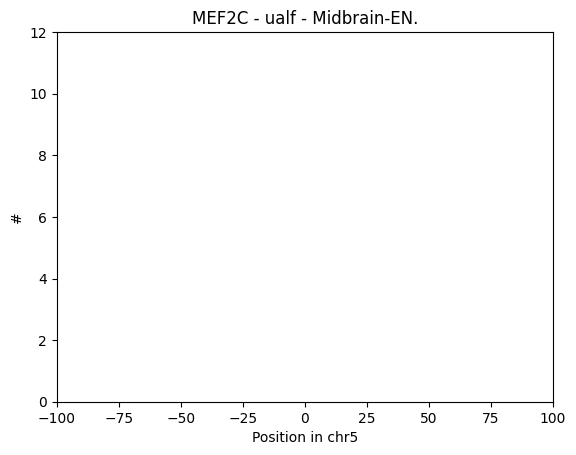

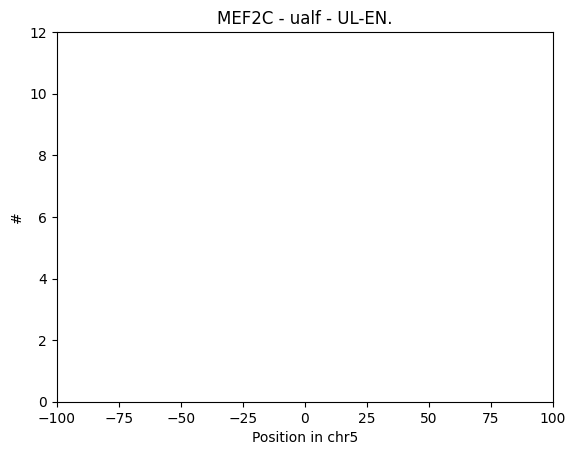

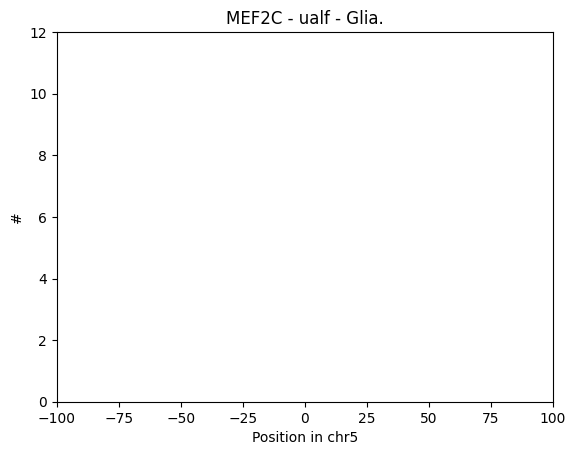

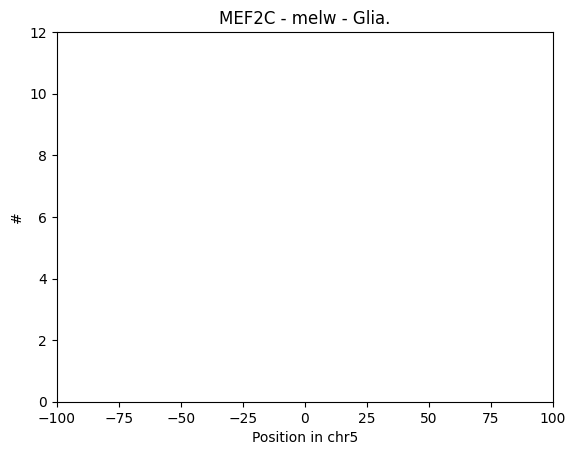

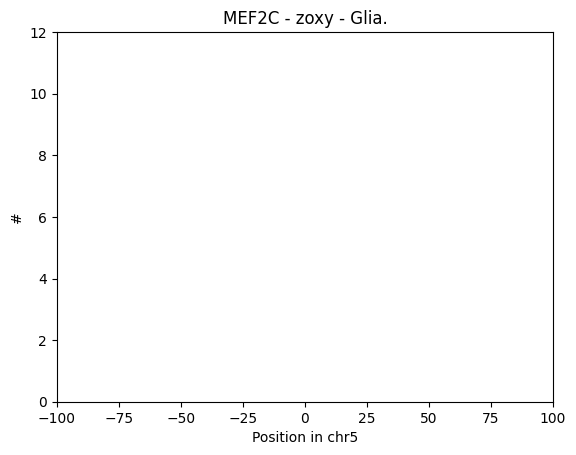

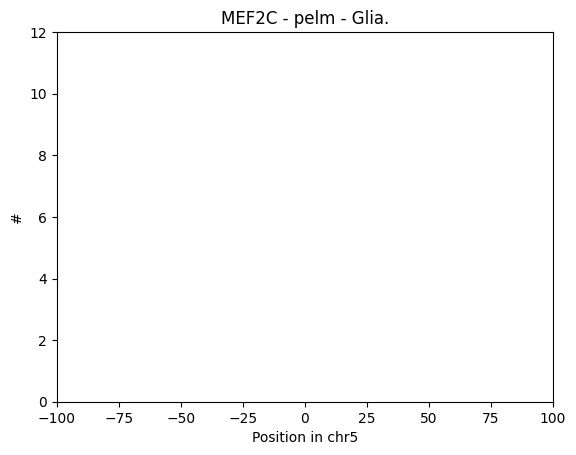

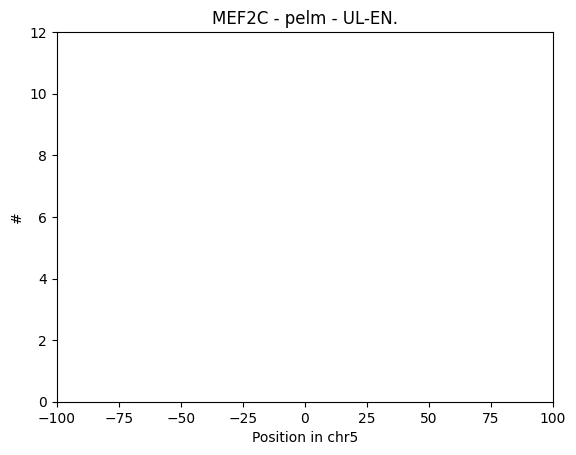

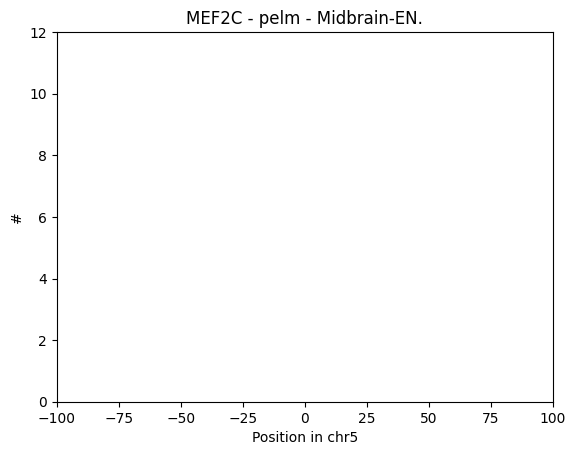

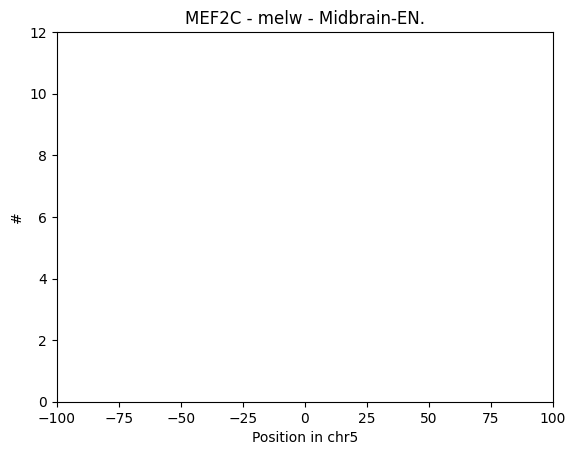

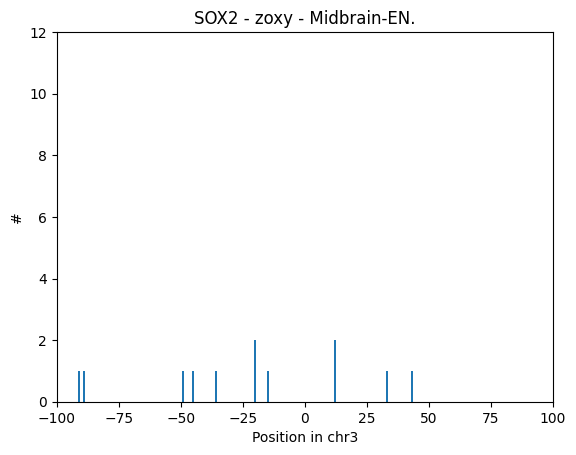

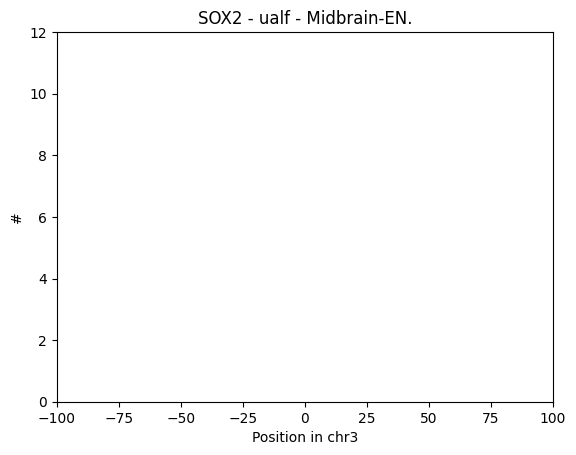

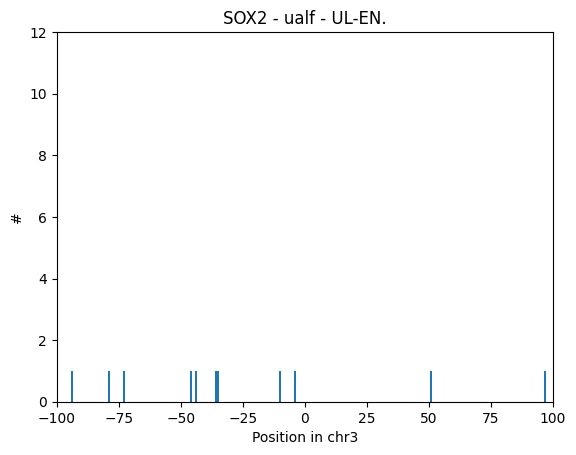

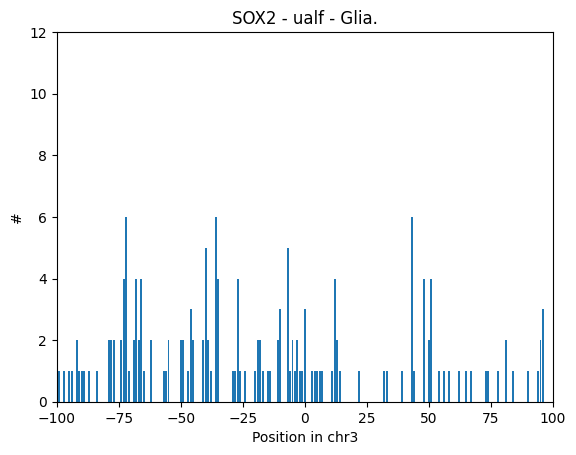

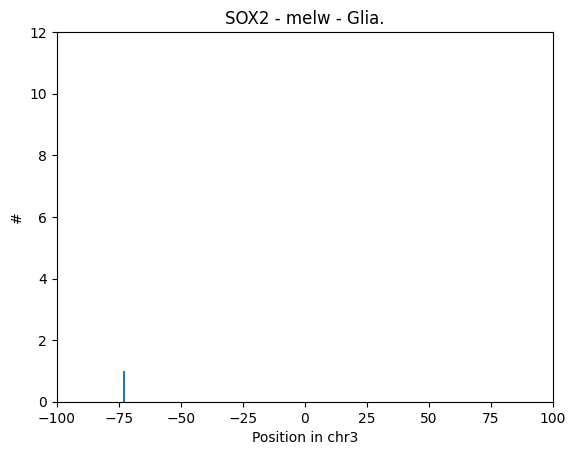

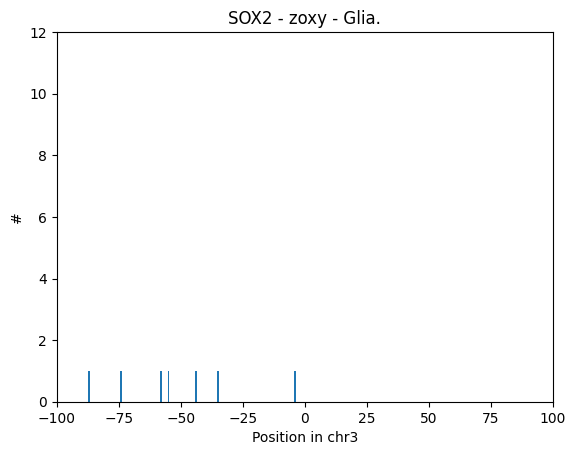

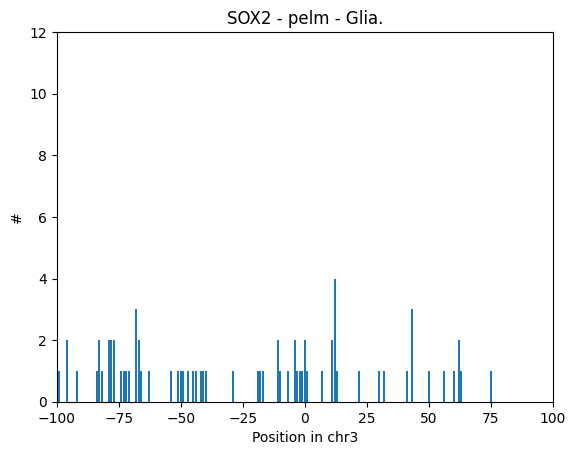

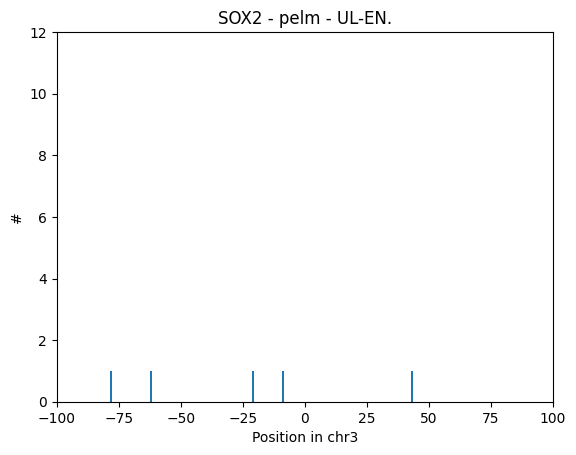

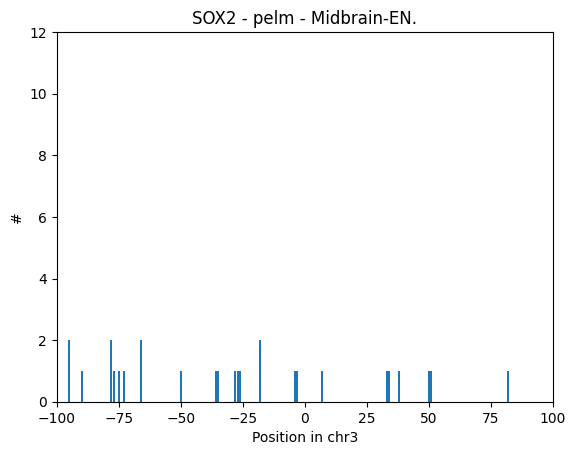

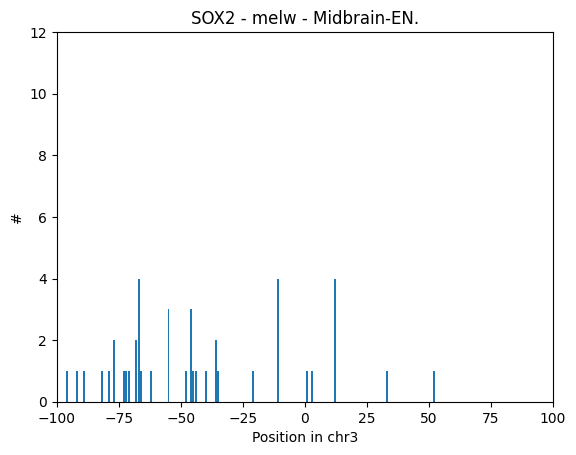

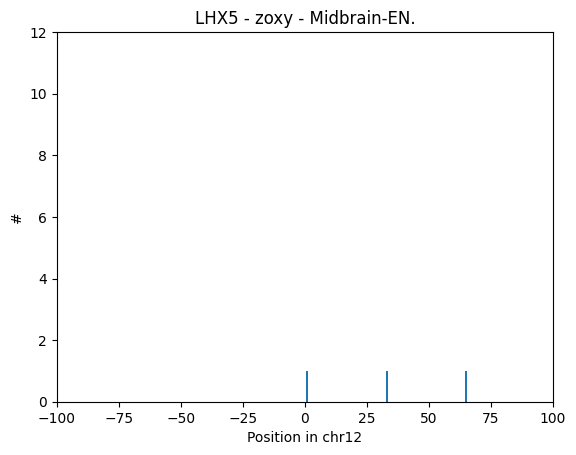

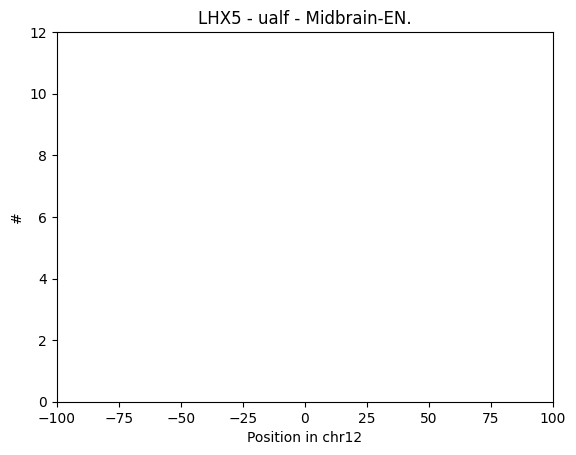

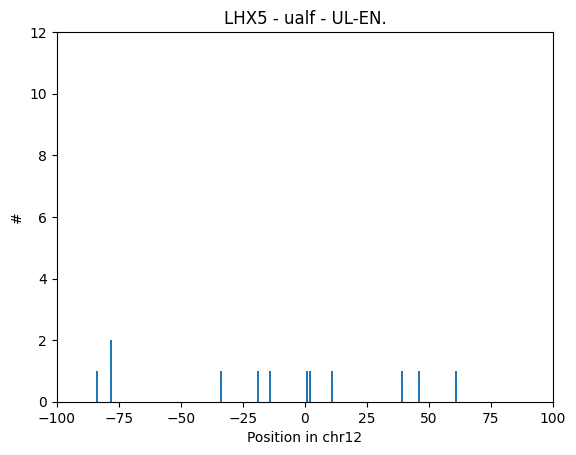

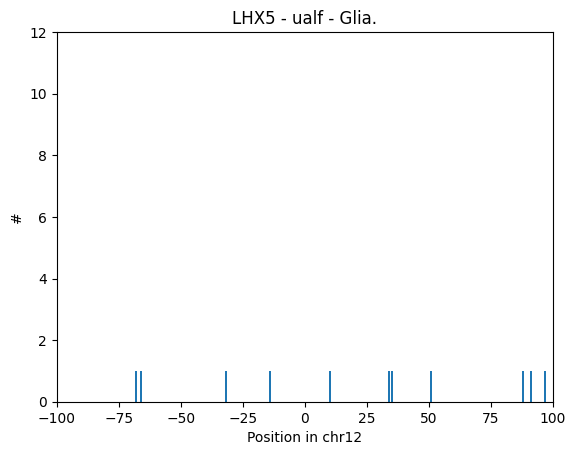

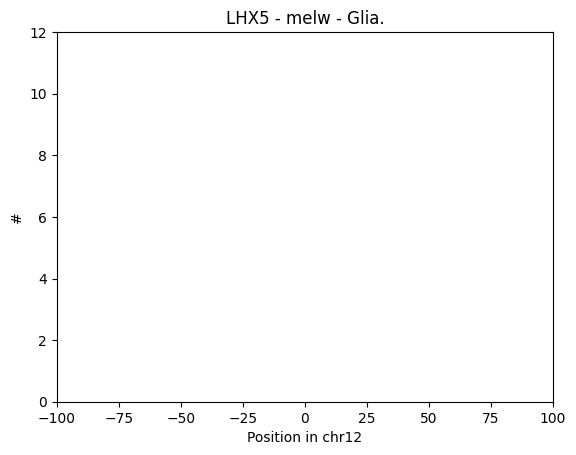

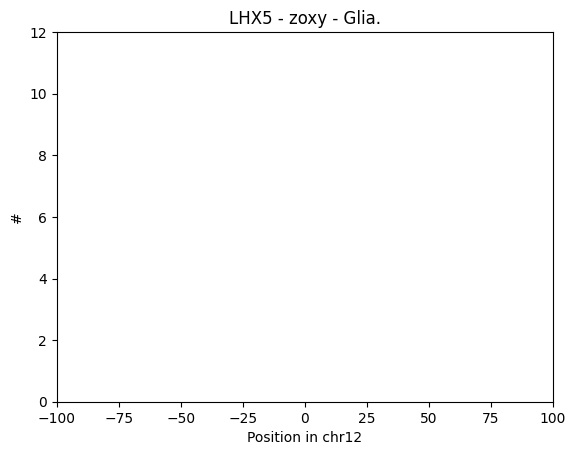

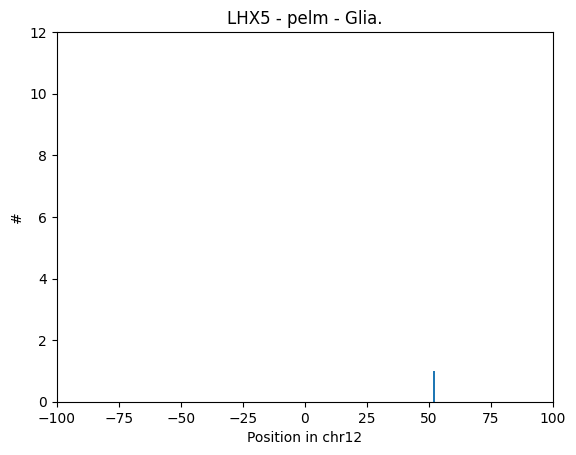

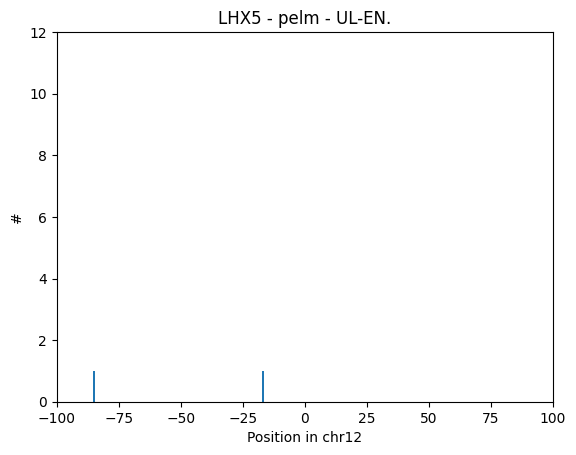

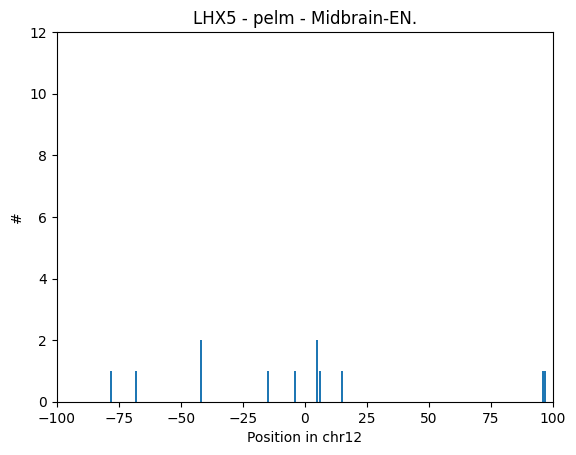

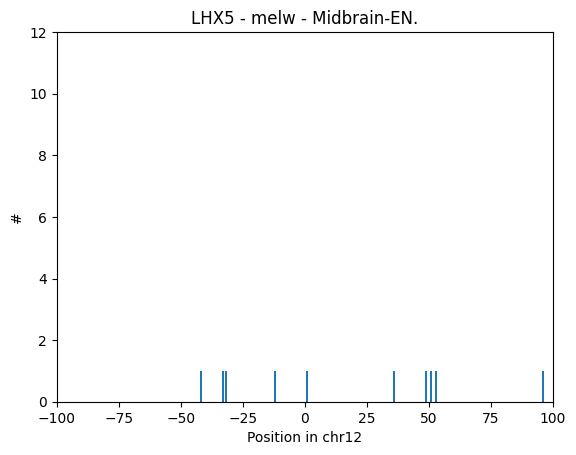

In [8]:
for r in regions.keys():


    for i in [f for f in os.listdir(DATA_PATH_SAFT) if os.path.isfile(f'{DATA_PATH_SAFT}/{f}') and f.endswith('.bw')]:
    
        bw = pyBigWig.open(f'{DATA_PATH_SAFT}/{i}')
    
        cov = bw.values(*regions[r], numpy=True)
            
        bw.close()
        
        i = i[:-2].split('_')
        donor = i[0]
        ct = i[1]
        lenth = len(cov)

        plt.bar(np.linspace(-(lenth // 2), lenth // 2, lenth), cov)

        plt.xlim([-(lenth // 2), lenth // 2])
        plt.ylim([0, 12])

        plt.title(f'{r} - {donor} - {ct}')
        plt.xlabel(f'Position in {regions[r][0]}')
        plt.ylabel('#')

        plt.show()
